# Preparing Colab for Assignment
FAQ on this [doc](https://docs.google.com/document/d/1t_PoKJVkqzBQljdadJdTvNNS4AUEn4fgCxt2k34j06w/edit?usp=sharing).

## Utils

In [1]:
def show_gray(img,title=""):
  """
  Function to show grayscale image
  """
  plt.imshow(img,cmap='gray')
  plt.title(title)

## Download the Dataset

In [2]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

# file_id = '1gCiAZnEiEzOsrfU97Z7lk0pjDhiBnfF0'
file_id = '1Z73UHw9IS492qxHvNUiB7-DidVl_ePfg'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [3]:
!unzip -q dataset.zip
!rm -rf dataset.zip

replace dataset/Image1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image4.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image5.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image6.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image7.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image8.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES
replace dataset/Image9.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: YES


# Assumptions
Mention all assumptions or considerations that you have made while attempting the assignment if any.

[TODO]
<!-- Write your answer below -->
1. It is assumed that the images are black and white in colour, thus in total number of pixels, the depth is taken as 1.
2. In order to handle the edge case of mse being 0, seeing the formula PSNR tends to infinity. In order to handle this case, we return an arbitary value of 100. This value can be any high positive value.
3. Amount is assumed to be the fraction to be used for corruption.

# Metrics
Here you need to complete the MSE and PSNR metrics formula which will be used later on to test the automated grader. Please do not change the function definitions. Else the grader will fail.

Objective: To complete the given functions for **0.6 mark** each.


In [4]:
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

def MSE(image1,image2):
  """ 
  Mean Squared Error
  :param image1: image1
  :param image2: image2
  :rtype: float
  :return: MSE value
  """
  # [TODO]
  squared_diff = np.square(np.subtract(image1.astype("float"), image2.astype("float"))) #Taking the squared difference between the two images
  mse = np.mean(squared_diff) #averaging over the total number of pixels 
  return mse

def PSNR(image1, image2, peak=255):
  """ 
  Peak signal-to-noise ratio
  :param image1: image1
  :param image2: image2
  :param peak: max value of pixel 8-bit image (255)
  :rtype: float
  :return: PSNR value
  """
  # [TODO]
  mse = MSE(image1, image2) # calculating mse loss here to use the formula of psnr in which mse is a variable
  #Handling corner case
  if mse==0:
    return 100 #returning an arbitary value of 100 which can be more also in case of 0 MSE since theoritically it should result in infinite PSNR

  psnr = 20*np.log10(peak/np.sqrt(mse))
  return psnr

In [5]:
#@title Grader { vertical-output: true }
seed =  200#@param {type:"integer"}
# Grader, please don't touch [Can run to check] [seed will be changed later]
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

np.random.seed(seed)
image1 = np.random.randint(0,256,(1280,720,3))
image2 = np.random.randint(0,256,(1280,720,3))

print(f"Skimage -> PSNR: {peak_signal_noise_ratio(image1,image2,data_range=255):.4f} | MSR: {mean_squared_error(image1,image2):.4f}")
print(f"My Func -> PSNR: {PSNR(image1,image2):.4f} | MSR: {MSE(image1,image2):.4f}")

Skimage -> PSNR: 7.7475 | MSR: 10922.7525
My Func -> PSNR: 7.7475 | MSR: 10922.7525


# Creating Noisy Images
***Objective:*** To complete the given class functions for **1 mark** each. 

>  MSE: To match within error of +- 200.0 \
  PSNR: To match within error of +- 2.0


## Salt n Pepper Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

## Gaussian Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Gaussian_noise). 

In [6]:
from skimage.util import random_noise
import numpy as np

class NoisySystem():
  def example(self,img,**kwargs):
    """
    An example function to test expected return.
    You can read more about skimage.util.random_noise at https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise
    """
    noisy_image = random_noise(img,**kwargs)
    noisy_image = np.uint8(noisy_image*255)
    return noisy_image

  def create_salt_and_pepper_noise(self,img,amount=0.05):
    """
    function to create salt and pepper noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    
    """
    # [TODO]  
    image = np.copy(img) #creating copy
    height  = img.shape[0]
    width = img.shape[1]
    tot_pixels = height*width
    amount/=2
    num_pixels = int(np.ceil(tot_pixels*amount)) #tot_pixels*amount is the total pixels to be corrupted and divided by two for black and white
    for i in range(num_pixels):
      #choose a random pixel to be changed to white
      x1 = np.random.randint(0,height-1)
      y1 = np.random.randint(0,width-1)
      image[x1][y1] = 255 #making it white

      #choode a random pixel to be changed to black
      x2 = np.random.randint(0,height-1)
      y2 = np.random.randint(0,width-1)
      image[x2][y2] = 0 #making it black
      
      
    return image

  def create_gaussian_noise(self,img,mean=0,var=0.01):
    """
    function to create gaussian noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    """
    # [TODO]
    image = np.copy(img) #creating copy
    height  = img.shape[0]
    width = img.shape[1]
    gaussian_noise = np.random.normal(mean, var**0.5, (height, width)) #define Gaussian noise
    max_intensity = 255
    gaussian_noise = max_intensity*gaussian_noise #convert it to range 0-255
    image = image + gaussian_noise #adding the noise
    return image

In [7]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 1 #@param {type:"slider", min:1, max:10, step:1}
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output(wait=True)

start = time.time()

noise_maker               = NoisySystem()
image                     = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                     = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

salt_and_pepper_example   = noise_maker.example(image.copy(),mode="s&p")
gaussian_example          = noise_maker.example(image.copy(),mode="gaussian")
salt_and_pepper_image     = noise_maker.create_salt_and_pepper_noise(image.copy())
gaussian_image            = noise_maker.create_gaussian_noise(image.copy())

end = time.time()
print(f"Total Time taken: {end-start:.2f}s\n")
print("Statistics:")
print(f"Example   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Example   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"My Func   => SNP -> PSNR: {PSNR(salt_and_pepper_image,image):.2f} | MSE: {MSE(salt_and_pepper_image,image):.2f}")
print(f"My Func   => GSN -> PSNR: {PSNR(gaussian_image,image):.2f} | MSE: {MSE(gaussian_image,image):.2f}")

Total Time taken: 0.13s

Statistics:
Example   => SNP -> PSNR: 17.80 | MSE: 1078.32
Example   => GSN -> PSNR: 20.29 | MSE: 607.59
My Func   => SNP -> PSNR: 17.97 | MSE: 1037.58
My Func   => GSN -> PSNR: 19.98 | MSE: 652.69


# Non Local Means **4 marks**

***Primary Objective:*** To complete Non Local Means denoiser. **2 marks** for completetion.

***Secondary Objective:*** 
1. To optimise for **MSE**. (out of 1 mark *relatively*)
2. To optimise for **time**.  (out of 1 mark *relatively*)

In [8]:
class NLMeans():
  """
  Non Local Means, do not change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain from changing 
  function/class definitions already given. These will be used to grade later on.
  """
  def example(self,img,**kwargs):
    denoised_image = cv2.fastNlMeansDenoising(img,**kwargs)
    return denoised_image
  
  #create sub-matrices of 7*7 from 21*21 image
  def sub_matrix(self, x, y, window, img):
    height = img.shape[0]
    width = img.shape[1]
    depth = img.shape[2]
    size = window//2

    neighbourhood = np.zeros((window, window, depth))
    x_min, x_max = max(0, x-size), min(width, x+size+1)
    y_min, y_max = max(0, y-size), min(height, y+size+1)

    # Fetch the correct size of the neighbourhood
    neighbourhood[size - (y-y_min):size + (y_max-y), size - (x-x_min):size + (x_max-x)] = img[y_min:y_max, x_min:x_max]
    return neighbourhood

  def submatrix_vectorized(self, small_window, big_window, pad, h, w):
    final=np.zeros((h+big_window-1, w+big_window-1, small_window, small_window)) # initialized with zeroes
    # np-array to store 7*7 for each x,y 

    for i in range(h+big_window-1):
      for j in range(w+big_window-1):
        temp=np.zeros((small_window,small_window))
        temp=pad[i:i+small_window,j:j+small_window]
        final[i,j]=np.squeeze(temp)

    return final


  def solve(self,img,h=30,small_window=7,big_window=21):
    """
    Solve function to perform nlmeans filtering.

    :param img: noisy image
    :param h: sigma h (as mentioned in the paper)
    :param small_window: size of small window
    :param big_window: size of big window
    :rtype: uint8 (w,h)
    :return: solved image
    """
    # [TODO]
    img_copy = np.copy(img)                           #copying the image
    height = img_copy.shape[0]
    width = img_copy.shape[1]
    padding = (small_window//2) + (big_window//2)     #calculating the padding
    padding_to_be_added = np.pad(img_copy, padding)   #padded image

    final_img = np.zeros((height, width))             #final image
    neighbour = self.submatrix_vectorized(small_window, big_window, padding_to_be_added, height, width)       #The 7x7 neighbourhood in the padded image for all pixels
    flat_img = np.reshape(neighbour, (height+big_window-1, width+big_window-1, small_window*small_window))    #reshaping the image from 7*7 to 49

    for i in range(height):
      for j in range(width):
        i_orig = i + (big_window//2)                  #shifting to original coordinates
        j_orig = j + (big_window//2)

        pixel_i = flat_img[i:i+big_window, j:j+big_window]    #big window of size 21*21
        pixel_j = neighbour[i_orig,j_orig].flatten()

        exponential = np.exp(-np.sqrt(np.sum(np.square(np.subtract(pixel_i, pixel_j)), axis=2))/(h**2))
        
        Z = np.sum(exponential)   #Z-term

        avg_pixel = np.squeeze(self.sub_matrix(j_orig+((small_window-1)//2), i_orig+((small_window-1)//2), big_window, padding_to_be_added[:, :, None]))  #average pixel value

        NL = np.sum(exponential*avg_pixel)

        final_img[i, j] = NL/Z
        
    return final_img


# [TODO]
# Will be checked on image 3.
# Report your best salt_and_paper_h: 10
# Report your best gaussian_h: 10

(Inbuilt) Time taken: 0.76s

(My function) Time taken: 72.37s

Statistics:
salt_and_paper_h: 10 , gaussian_h: 10

Noisy   => SNP -> PSNR: 18.33 | MSE: 956.00
Noisy   => GSN -> PSNR: 20.14 | MSE: 629.01
Skimage => SNP -> PSNR: 18.35 | MSE: 951.01
Skimage => GSN -> PSNR: 20.15 | MSE: 628.27
My Func => SNP -> PSNR: 22.39 | MSE: 374.73
My Func => GSN -> PSNR: 22.95 | MSE: 329.79



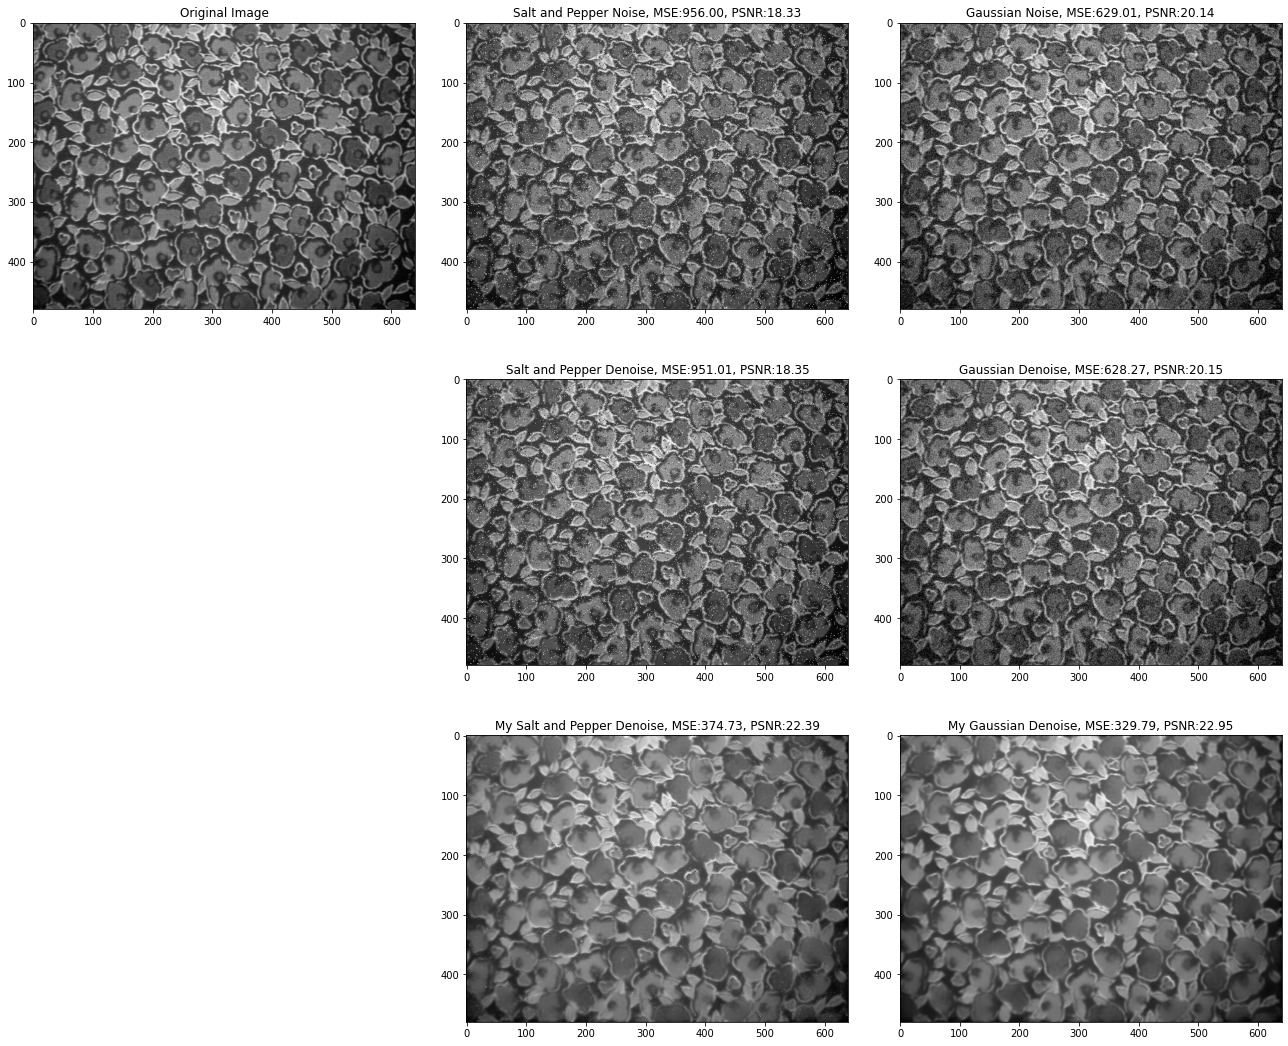

In [30]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 10 #@param {type:"slider", min:1, max:10, step:1}
salt_and_paper_h =   10#@param {type:"integer"}
gaussian_h = 10        #@param {type:"integer"}
 
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
 
clear_output(wait=True)
 
 
denoiser                    = NLMeans()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
 
start = time.time()
 
salt_and_pepper_denoise     = denoiser.example(salt_and_pepper_example.copy(),h=salt_and_paper_h)
gaussian_denoise            = denoiser.example(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(Inbuilt) Time taken: {end-start:.2f}s\n")
 
start = time.time()
 
my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
my_gaussian_denoise         = denoiser.solve(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(My function) Time taken: {end-start:.2f}s\n")
 
print("Statistics:")
print(f"salt_and_paper_h: {salt_and_paper_h} , gaussian_h: {gaussian_h}\n")
print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"Skimage => SNP -> PSNR: {PSNR(salt_and_pepper_denoise,image):.2f} | MSE: {MSE(salt_and_pepper_denoise,image):.2f}")
print(f"Skimage => GSN -> PSNR: {PSNR(gaussian_denoise,image):.2f} | MSE: {MSE(gaussian_denoise,image):.2f}")
print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
 
fig = plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
show_gray(image,"Original Image")
plt.subplot(3,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(3,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(3,3,5)
show_gray(salt_and_pepper_denoise,
          f"Salt and Pepper Denoise, MSE:{MSE(image,salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,6)
show_gray(gaussian_denoise,
          f"Gaussian Denoise, MSE:{MSE(image,gaussian_denoise):.2f}, PSNR:{PSNR(image,gaussian_denoise):.2f}")
plt.subplot(3,3,8)
show_gray(my_salt_and_pepper_denoise,
          f"My Salt and Pepper Denoise, MSE:{MSE(image,my_salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,9)
show_gray(my_gaussian_denoise,
          f"My Gaussian Denoise, MSE:{MSE(image,my_gaussian_denoise):.2f}, PSNR:{PSNR(image,my_gaussian_denoise):.2f}")
fig.tight_layout()
plt.show()

### Methodology **0.5 mark**
Explain the methodology of your non-Local means algorithm in detail. 

[TODO]
<!-- Write your answer below. -->
The paper has a lot of mention of previous old algorithms that remove noise from the image. In this assignment, we artificially add noise through two noise models i.e. Salt and Pepper model(SNP) and Gaussian Noise model.

In order to remove the noise, we assign a NL value to each pixel in the image. The NL value is the weighted average of all the pixels in the image.
However, instead of considering all pixels which was used in previous algorithms, we use a window of size 21x21 (named big window) with the pixel in the centre to assign an NL value to that pixel.

Inside of these 21x21 window, I used a small window of sixze 7x7 to iterate through that and assign the values to each pixel by calculating the negative exponent of the norm of the two vectors divided by the square of the filtering parameter (sigma_h) for weight assignment.

In order to reduce the time complexity of the algorithm, a vectorized approach is used so that it calculates all the neighbouring values which can be used later.

The image is padded on either side with a constant pad value of 13 for the 21x21 (big window) neighbourhood of each pixel and then 7x7 (small window) of each pixel in that submatrix.

Considering the weight of all the pixels, assigning the shifted value to all the pixels at every iteration. The average pixel value is calculated and the Z value is calculated using the sum of the 2nd order norm exponents. Finally, the NL value is the multiplication of the weight and neighborhood's average pixel value and dividing by Z.

The time complexity of the improved algorithm is $441*49*N^2$ where N is the height/width of the image.

### Your understanding of the sigma\_h, small\_window and big\_window parameters **0.5 mark**

[TODO]
<!-- Write your answer below. -->
The filtering parameter h determines the degree of filtering. It affects the decay parameter of the exponential function and the decay of weights over distance. Thus, if the h is too high, the decay is very fast and the image features are lost. If the h value is too low, the decay is too slow for the image to be denoised to the needed amount.

The small_window and big_window parameters are defined to improve the time complexity of our algorithm as written above. We check the similarity of pixels in the small window of size 7x7 in its neighbourhood within the bounds of only the big window search space/window (i.e, 21x21 neighbourhood) and not over the entire image. This decreases the search space. This helps to reduce the time complexity. However, if the window sizes are not chosen appropriately, there can be bad results as the algorithm is compromised. 

### Metrics (MSE and PSNR) obtained **0.5 mark**
Report the metrics (MSE and PSNR) obtained for both the denoising methods for all the 10 images tabulated properly. You may use something like [this](https://www.tablesgenerator.com/markdown_tables) to generate the tables. Alternatively (not preferred), you may attach a screenshot of a table created elsewhere.

[TODO]
<!-- Write your answer below. -->
| Img no. | Type of Noise | PSNR Noise | MSE Noise | NL PSNR | NL MSE | Gauss PSNR | Gauss MLE | Diff in PSNR(NL-Gauss) | Diff in MLE(NL-Gauss) |
|---------|---------------|------------|-----------|---------|--------|------------|-----------|------------------------|-----------------------|
| 1       | SNP           | 17.88      | 1059.70   | 27.96   | 103.97 | 27.78      | 108.34    | 0.18                   | -4.37                 |
|         | Gaussian      | 20.29      | 608.14    | 29.46   | 73.56  | 30.06      | 64.18     | -0.6                   | 9.38                  |
| 2       | SNP           | 18.18      | 988.30    | 23.14   | 315.33 | 26.59      | 142.26    | -3.45                  | 173.07                |
|         | Gaussian      | 20.26      | 612.13    | 24.12   | 252.00 | 28.44      | 93.16     | -4.32                  | 158.84                |
| 3       | SNP           | 18.14      | 998.35    | 24.49   | 231.00 | 23.55      | 287.11    | 0.94                   | -56.11                |
|         | Gaussian      | 20.50      | 579.82    | 25.62   | 178.30 | 24.20      | 247.28    | 1.42                   | -68.98                |
| 4       | SNP           | 17.79      | 1080.84   | 26.33   | 151.31 | 25.67      | 176.34    | 0.66                   | -25.03                |
|         | Gaussian      | 20.27      | 611.67    | 27.69   | 110.79 | 27.16      | 125.06    | 0.53                   | -14.27                |
| 5       | SNP           | 16.70      | 1391.16   | 27.33   | 120.19 | 26.33      | 151.34    | 1                      | -31.15                |
|         | Gaussian      | 21.94      | 416.46    | 29.36   | 75.28  | 28.64      | 88.86     | 0.72                   | -13.58                |
| 6       | SNP           | 17.78      | 1083.86   | 22.62   | 356.03 | 23.30      | 304.38    | -0.68                  | 51.65                 |
|         | Gaussian      | 20.41      | 591.08    | 24.59   | 225.74 | 24.16      | 249.24    | 0.43                   | -23.5                 |
| 7       | SNP           | 17.06      | 1279.21   | 24.45   | 233.65 | 25.23      | 194.84    | -0.78                  | 38.81                 |
|         | Gaussian      | 21.32      | 480.22    | 25.87   | 168.32 | 27.03      | 128.99    | -1.16                  | 39.33                 |
| 8       | SNP           | 16.67      | 1400.09   | 28.34   | 95.35  | 26.81      | 135.61    | 1.53                   | -40.26                |
|         | Gaussian      | 21.97      | 413.37    | 30.77   | 54.50  | 29.22      | 77.76     | 1.55                   | -23.26                |
| 9       | SNP           | 17.47      | 1165.47   | 27.54   | 114.64 | 26.83      | 134.79    | 0.71                   | -20.15                |
|         | Gaussian      | 20.91      | 527.43    | 29.51   | 72.77  | 28.72      | 87.32     | 0.79                   | -14.55                |
| 10      | SNP           | 18.33      | 956.00    | 22.39   | 374.73 | 25.19      | 196.70    | -2.8                   | 178.03                |
|         | Gaussian      | 20.14      | 629.01    | 22.95   | 329.79 | 26.32      | 151.87    | -3.37                  | 177.92                |

### Comments on your observations about which method proves better for different noise types **0.5 mark**

[TODO]
<!-- Write your answer below. -->
The NL Means Algorithm performs better since it is better than the Gaussian Filtering in most of the images with Salt and Pepper noise and Gaussian noise.

Observations:
- The PSNR has increased a lot as compared to that of Noisy images after filtering. More PSNR is better since it has MSE in it's denominator in the log function, so less MSE gives higher PSNR.

- The NL-Means filter identifies similar patches around noise and tries to remove them. But the Gaussian filter flattens the noise and and it appears to work well indicated by the metrics but it does not remove the noise.

- The Salt and Pepper noise is highly localised and hence can be effectively removed by the window approach of the NL means algorithm.

- The Gaussian filter essentially smoothens the noise instead of removing it. Thus, the NL-Means filter outperforms the Gaussian filter on Salt and Pepper noise and on Gaussian noise.

# Gaussian Filtering Comparison

***Objective:*** Show comparison between NL Means denoising and Gaussian Denoising.  **0.8 mark**


Show proper comparison for both the metrics (MSE and PSNR) for all of the images. Code will be checked on a random image.

In [10]:
class GaussianFilter():
  """
  GaussianFilter, donot change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain for function/class
  definitions already given. These will be used to grade later on.
  """

  def solve(self, img, ksize=(5,5), sigma_x=0):
    """
    Solve function to perform gaussian filtering.

    :param img: noisy image
    :param ksize: representing the size of the kernel.
    :param sigma_x: standard deviation in X direction
    :rtype: uint8 (w,h)
    :return: solved image
    """
    # [TODO] Can use cv2 inbuilt 
    return cv2.GaussianBlur(img, ksize, sigma_x)

(My function) Time taken: 0.00105s

Statistics:
Noisy   => SNP -> PSNR: 18.23 | MSE: 977.78
Noisy   => GSN -> PSNR: 20.14 | MSE: 629.73
My Func => SNP -> PSNR: 25.19 | MSE: 196.70
My Func => GSN -> PSNR: 26.32 | MSE: 151.87



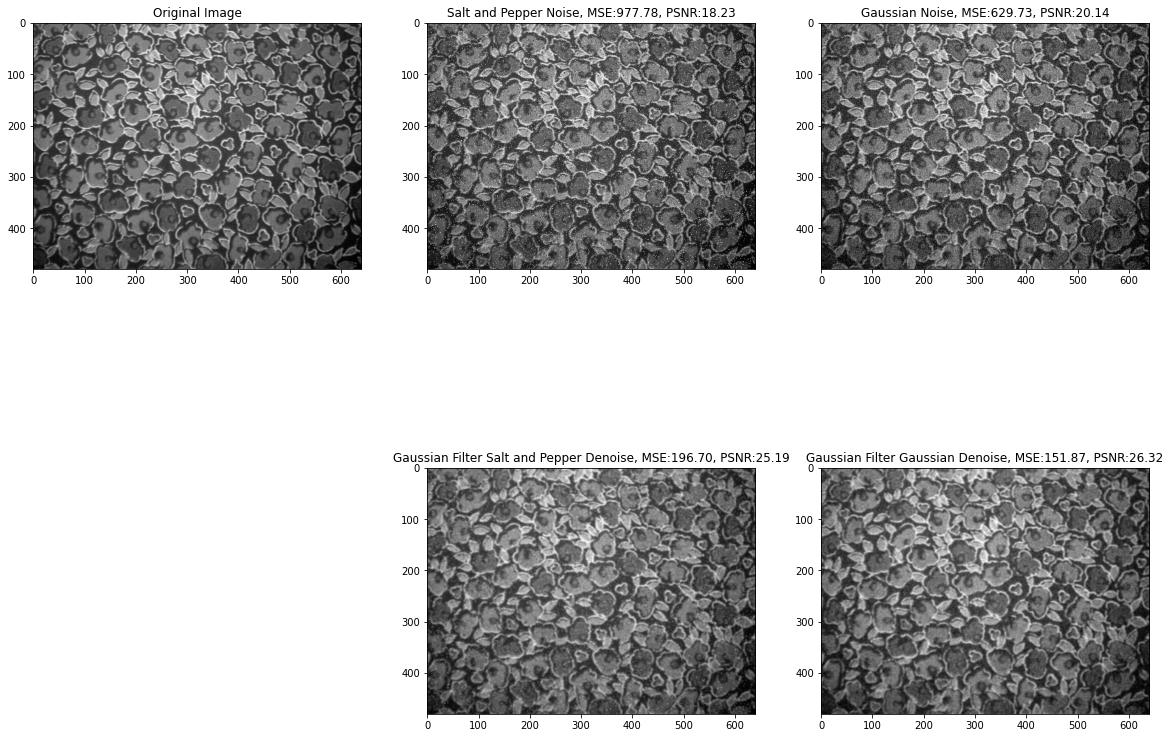

In [31]:
#@title Gaussian Filter Results { vertical-output: true, display-mode: "form" }
image_number = 10 #@param {type:"slider", min:1, max:10, step:1}
 
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
 
clear_output(wait=True)
 
denoiser                    = GaussianFilter()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")

start = time.time()
 
my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy())
my_gaussian_denoise         = denoiser.solve(gaussian_example.copy())
 
end = time.time()
print(f"(My function) Time taken: {end-start:.5f}s\n")
 
print("Statistics:")
print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
 
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
show_gray(image,"Original Image")
plt.subplot(2,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(2,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(2,3,5)
show_gray(my_salt_and_pepper_denoise,
          f"Gaussian Filter Salt and Pepper Denoise, MSE:{MSE(image,my_salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_denoise):.2f}")
plt.subplot(2,3,6)
show_gray(my_gaussian_denoise,
          f"Gaussian Filter Gaussian Denoise, MSE:{MSE(image,my_gaussian_denoise):.2f}, PSNR:{PSNR(image,my_gaussian_denoise):.2f}")
plt.show()

References:

- https://ieeexplore.ieee.org/abstract/document/1467423